<a href="https://colab.research.google.com/github/Tanucode/Deep-Learning-Practice/blob/main/Dataset(sentiment140)cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import re
import string
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [3]:
from google.colab import drive


In [4]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
data=pd.read_csv("/content/gdrive/MyDrive/sentiment140.csv",encoding='latin-1',header=None,
                 names=['polarity', 'id', 'date', 'query', 'user', 'text'])

In [6]:
data.head()

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
display(data)

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1048571,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048572,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048573,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048574,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?


In [8]:
data = data.drop(columns=['id', 'date', 'query', 'user'])

In [9]:
data.dropna(inplace=True)

In [10]:
display(data)

,polarity,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1048571,4,My GrandMa is making Dinenr with my Mum
1048572,4,Mid-morning snack time... A bowl of cheese noo...
1048573,4,@ShaDeLa same here say it like from the Termi...
1048574,4,@DestinyHope92 im great thaanks wbuu?


In [11]:
def clean_tweet(text):
    signs = r'@[^ ]+'                   #"@signs" and values
    links = r'https?://[A-Za-z0-9./]+'  #links
    extraletters = r'\'s'                      #floating s's
    hashtags = r'\#\w+'                     # hashtags and value
    ands = r'&amp '
    nonalphabet = r'[^A-Za-z\s]'         #remove non-alphabet
    combined_words = r'|'.join((signs, links,extraletters,hashtags,ands, nonalphabet))
    text = re.sub(combined_words,"",text).lower()
    return text.strip()

In [12]:
data["cleaned_text"]=data["text"].apply(clean_tweet)


In [13]:
display(data)

,polarity,text,cleaned_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that a bummer you shoulda got david carr...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no it not behaving at all im mad why am i here...
...,...,...,...
1048571,4,My GrandMa is making Dinenr with my Mum,my grandma is making dinenr with my mum
1048572,4,Mid-morning snack time... A bowl of cheese noo...,midmorning snack time a bowl of cheese noodles...
1048573,4,@ShaDeLa same here say it like from the Termi...,same here say it like from the terminiator mo...
1048574,4,@DestinyHope92 im great thaanks wbuu?,im great thaanks wbuu


In [14]:
data = data [ ~(data["cleaned_text"] =="")]

In [15]:
display(data)

,polarity,text,cleaned_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that a bummer you shoulda got david carr...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no it not behaving at all im mad why am i here...
...,...,...,...
1048571,4,My GrandMa is making Dinenr with my Mum,my grandma is making dinenr with my mum
1048572,4,Mid-morning snack time... A bowl of cheese noo...,midmorning snack time a bowl of cheese noodles...
1048573,4,@ShaDeLa same here say it like from the Termi...,same here say it like from the terminiator mo...
1048574,4,@DestinyHope92 im great thaanks wbuu?,im great thaanks wbuu


In [16]:
data["length"] = data["cleaned_text"].apply(len)

In [17]:
data.groupby("polarity")["length"].describe()

,count,mean,std,min,25%,50%,75%,max
polarity,,,,,,,,
0,798282.0,64.214048,34.386833,1.0,35.0,60.0,92.0,163.0
4,247927.0,60.913450,33.853713,1.0,33.0,56.0,87.0,153.0


In [18]:
display(data[['polarity','cleaned_text']])

,polarity,cleaned_text
0,0,awww that a bummer you shoulda got david carr...
1,0,is upset that he cant update his facebook by t...
2,0,i dived many times for the ball managed to sav...
3,0,my whole body feels itchy and like its on fire
4,0,no it not behaving at all im mad why am i here...
...,...,...
1048571,4,my grandma is making dinenr with my mum
1048572,4,midmorning snack time a bowl of cheese noodles...
1048573,4,same here say it like from the terminiator mo...
1048574,4,im great thaanks wbuu


In [19]:
x=data['cleaned_text']
y=data['polarity']

display(x)


0          awww that a bummer  you shoulda got david carr...
1          is upset that he cant update his facebook by t...
2          i dived many times for the ball managed to sav...
3             my whole body feels itchy and like its on fire
4          no it not behaving at all im mad why am i here...
                                 ...                        
1048571              my grandma is making dinenr with my mum
1048572    midmorning snack time a bowl of cheese noodles...
1048573    same here  say it like from the terminiator mo...
1048574                               im great thaanks  wbuu
1048575                  cant wait til her date this weekend
Name: cleaned_text, Length: 1046209, dtype: object

In [20]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (836967,) (836967,)
Test set: (209242,) (209242,)


In [21]:
tfdif_vectorizer=TfidfVectorizer(max_features=8000)
X_train_tfidf=tfdif_vectorizer.fit_transform(X_train)
X_test_tfdif=tfdif_vectorizer.transform(X_test)
logistic_regression=LogisticRegression(max_iter=1000,solver='liblinear',class_weight='balanced')

logistic_regression.fit(X_train_tfidf , y_train)
#logistic_regression.fit(X_train , y_train)

y_pred=logistic_regression.predict(X_test_tfdif)
#y_pred=logistic_regression.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
report= classification_report(y_test,y_pred)

print(f'accuracy: {accuracy:2f}\n')
print(report)







accuracy: 0.790525

              precision    recall  f1-score   support

           0       0.93      0.79      0.85    159604
           4       0.54      0.80      0.65     49638

    accuracy                           0.79    209242
   macro avg       0.73      0.79      0.75    209242
weighted avg       0.84      0.79      0.80    209242



In [22]:
tfdif_vectorizer=TfidfVectorizer(max_features=8000)
X_train_tfidf=tfdif_vectorizer.fit_transform(X_train)
X_test_tfdif=tfdif_vectorizer.transform(X_test)
logistic_regression=LogisticRegression(max_iter=100000)

logistic_regression.fit(X_train_tfidf , y_train)
#logistic_regression.fit(X_train , y_train)

y_pred=logistic_regression.predict(X_test_tfdif)
#y_pred=logistic_regression.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
report= classification_report(y_test,y_pred)

print(f'accuracy: {accuracy:2f}\n')
print(report)

accuracy: 0.847488

              precision    recall  f1-score   support

           0       0.87      0.94      0.90    159604
           4       0.75      0.53      0.62     49638

    accuracy                           0.85    209242
   macro avg       0.81      0.74      0.76    209242
weighted avg       0.84      0.85      0.84    209242



In [23]:
tfdif_vectorizer=TfidfVectorizer(max_features=8000)
X_train_tfidf=tfdif_vectorizer.fit_transform(X_train)
X_test_tfdif=tfdif_vectorizer.transform(X_test)
logistic_regression=LogisticRegression(max_iter=10000,class_weight='balanced',solver='newton-cg')

logistic_regression.fit(X_train_tfidf , y_train)
#logistic_regression.fit(X_train , y_train)

y_pred=logistic_regression.predict(X_test_tfdif)
#y_pred=logistic_regression.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
report= classification_report(y_test,y_pred)

print(f'accuracy: {accuracy:2f}\n')
print(report)

accuracy: 0.790520

              precision    recall  f1-score   support

           0       0.93      0.79      0.85    159604
           4       0.54      0.80      0.65     49638

    accuracy                           0.79    209242
   macro avg       0.73      0.79      0.75    209242
weighted avg       0.84      0.79      0.80    209242



In [24]:
data.head(10)

,polarity,text,cleaned_text,length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that a bummer you shoulda got david carr...,70
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,105
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,75
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,46
4,0,"@nationwideclass no, it's not behaving at all....",no it not behaving at all im mad why am i here...,84
5,0,@Kwesidei not the whole crew,not the whole crew,18
6,0,Need a hug,need a hug,10
7,0,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time no see yes rains a bit only a b...,78
8,0,@Tatiana_K nope they didn't have it,nope they didnt have it,23
9,0,@twittera que me muera ?,que me muera,12


,polarity,text,cleaned_text,length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that a bummer you shoulda got david carr...,70
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,105
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,75
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,46
4,0,"@nationwideclass no, it's not behaving at all....",no it not behaving at all im mad why am i here...,84
...,...,...,...,...
1048571,4,My GrandMa is making Dinenr with my Mum,my grandma is making dinenr with my mum,39
1048572,4,Mid-morning snack time... A bowl of cheese noo...,midmorning snack time a bowl of cheese noodles...,50
1048573,4,@ShaDeLa same here say it like from the Termi...,same here say it like from the terminiator mo...,79
1048574,4,@DestinyHope92 im great thaanks wbuu?,im great thaanks wbuu,22


798282
247927


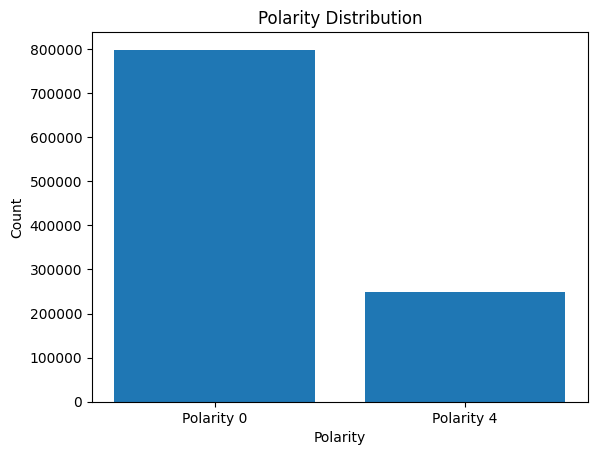

In [25]:
import matplotlib.pyplot as plt
import numpy as np

#display(data)
display(data)
x1=(data['polarity'].value_counts()[0])
print(x1)
x2=(data['polarity'].value_counts()[4])
print(x2)


# Values and labels for the bars
values = [x1, x2]
labels = ['Polarity 0', 'Polarity 4']

# Create a bar chart
plt.bar(labels, values)

# Add labels and title
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Distribution')

# Show the plot
plt.show()

,polarity,text,cleaned_text,length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that a bummer you shoulda got david carr...,70
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,105
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,75
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,46
4,0,"@nationwideclass no, it's not behaving at all....",no it not behaving at all im mad why am i here...,84
...,...,...,...,...
1048571,4,My GrandMa is making Dinenr with my Mum,my grandma is making dinenr with my mum,39
1048572,4,Mid-morning snack time... A bowl of cheese noo...,midmorning snack time a bowl of cheese noodles...,50
1048573,4,@ShaDeLa same here say it like from the Termi...,same here say it like from the terminiator mo...,79
1048574,4,@DestinyHope92 im great thaanks wbuu?,im great thaanks wbuu,22


798282
247927


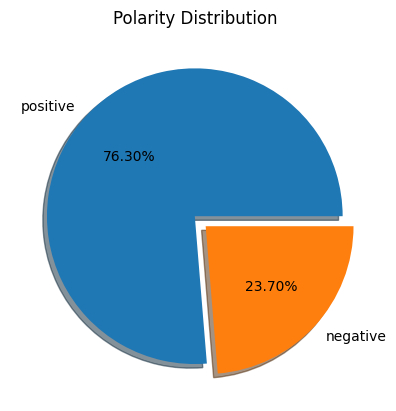

In [26]:
import matplotlib.pyplot as plt
import numpy as np

#display(data)
display(data)
x1=(data['polarity'].value_counts()[0])
print(x1)
x2=(data['polarity'].value_counts()[4])
print(x2)


# Values and labels for the bars
#values = [x1, x2]
#labels = ['Polarity 0', 'Polarity 4']

# Create a bar chart
plt.pie([x1,x2],autopct='%1.2f%%',labels=['positive','negative'],explode=[0,0.1],shadow='true')

# Add labels and title
#plt.xlabel('Polarity')
#plt.ylabel('Count')
plt.title('Polarity Distribution')

# Show the plot
plt.show()

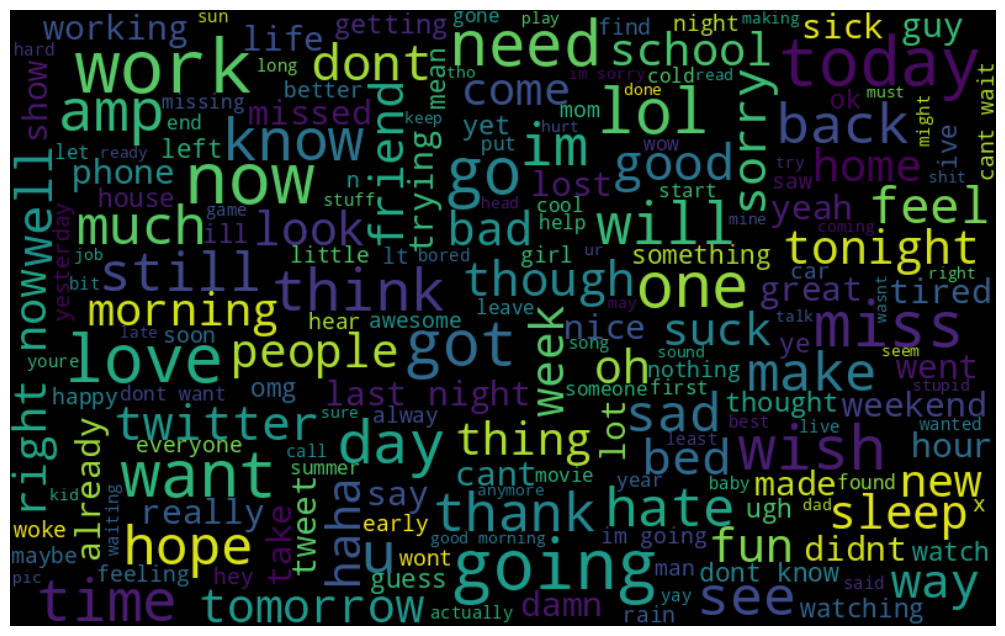

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
def graphone(word):
    wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=60).generate(word)
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


all_cleaned_text = " ".join([sentence for sentence in data['cleaned_text']])
graphone(all_cleaned_text)

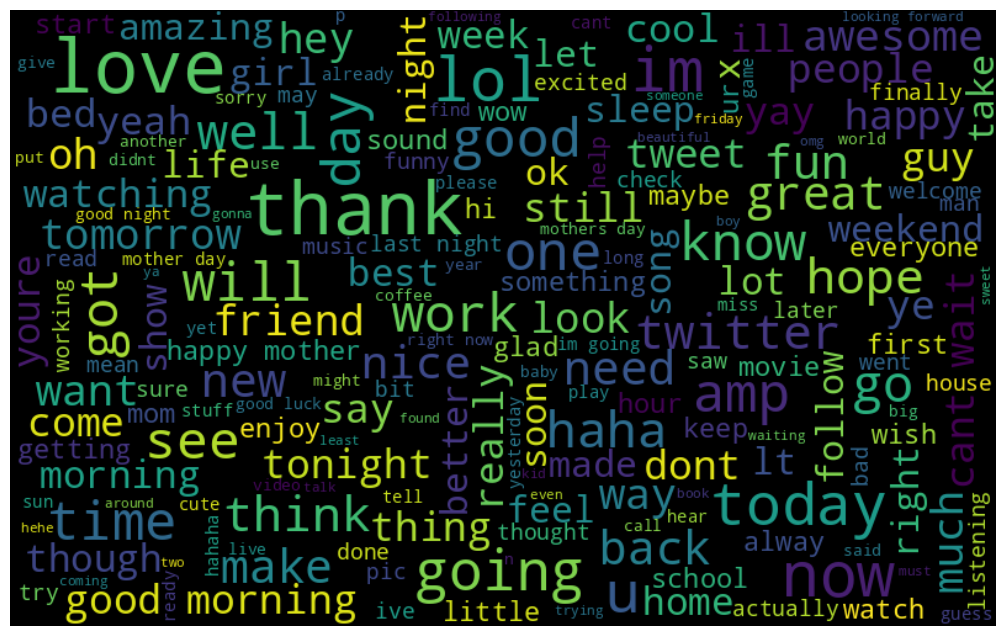

In [28]:
positive_tweets = data[data['polarity'] == 4]
positive_text = " ".join(positive_tweets['cleaned_text'])
graphone(positive_text)

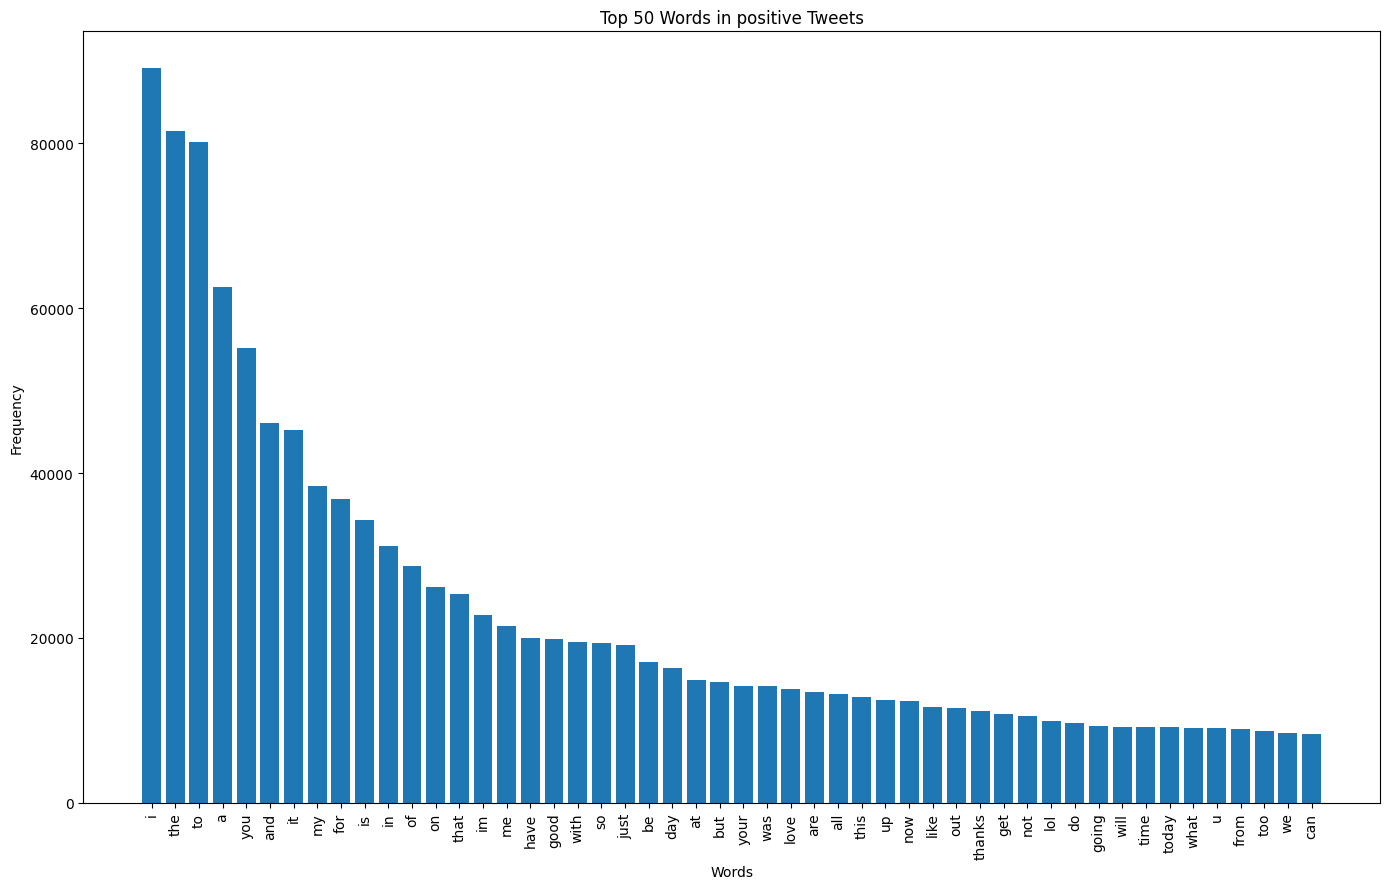

In [30]:
from collections import Counter


positive_tweets = data[data['polarity'] == 4]

word_counts = Counter()

for text in positive_tweets['cleaned_text']:
    words = text.split()
    word_counts.update(words)


top_words = word_counts.most_common(50)


words, counts = zip(*top_words)


plt.figure(figsize=(14, 9))
plt.bar(words,counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Words in positive Tweets')
plt.xticks(rotation=90)  # Rotate the x-axis labels to a vertical position
plt.tight_layout()
plt.show()

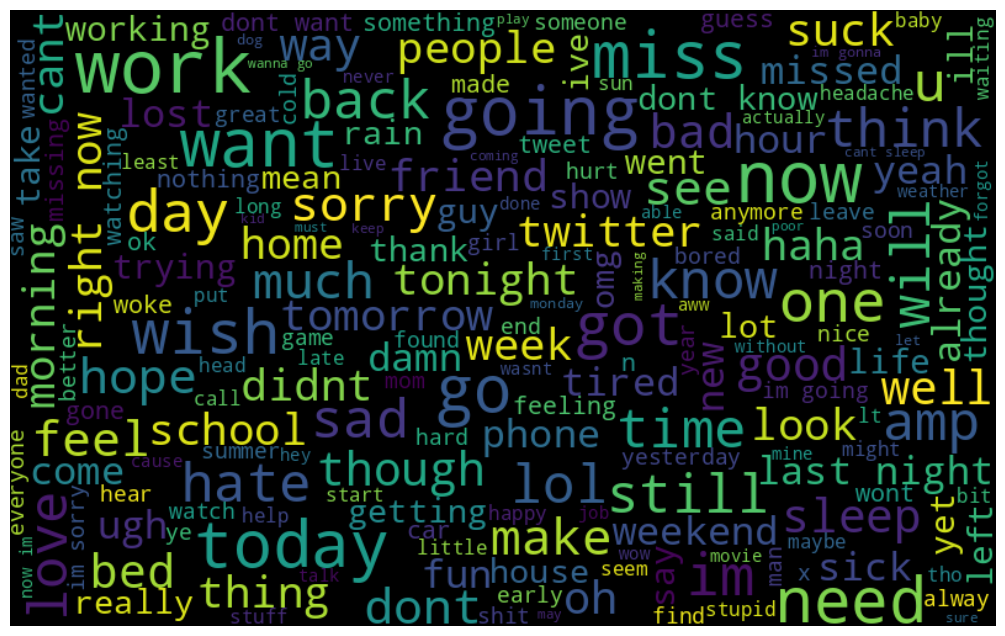

In [32]:
negative_tweets = data[data['polarity'] == 0]
negative_text = " ".join(negative_tweets['cleaned_text'])
graphone(negative_text)

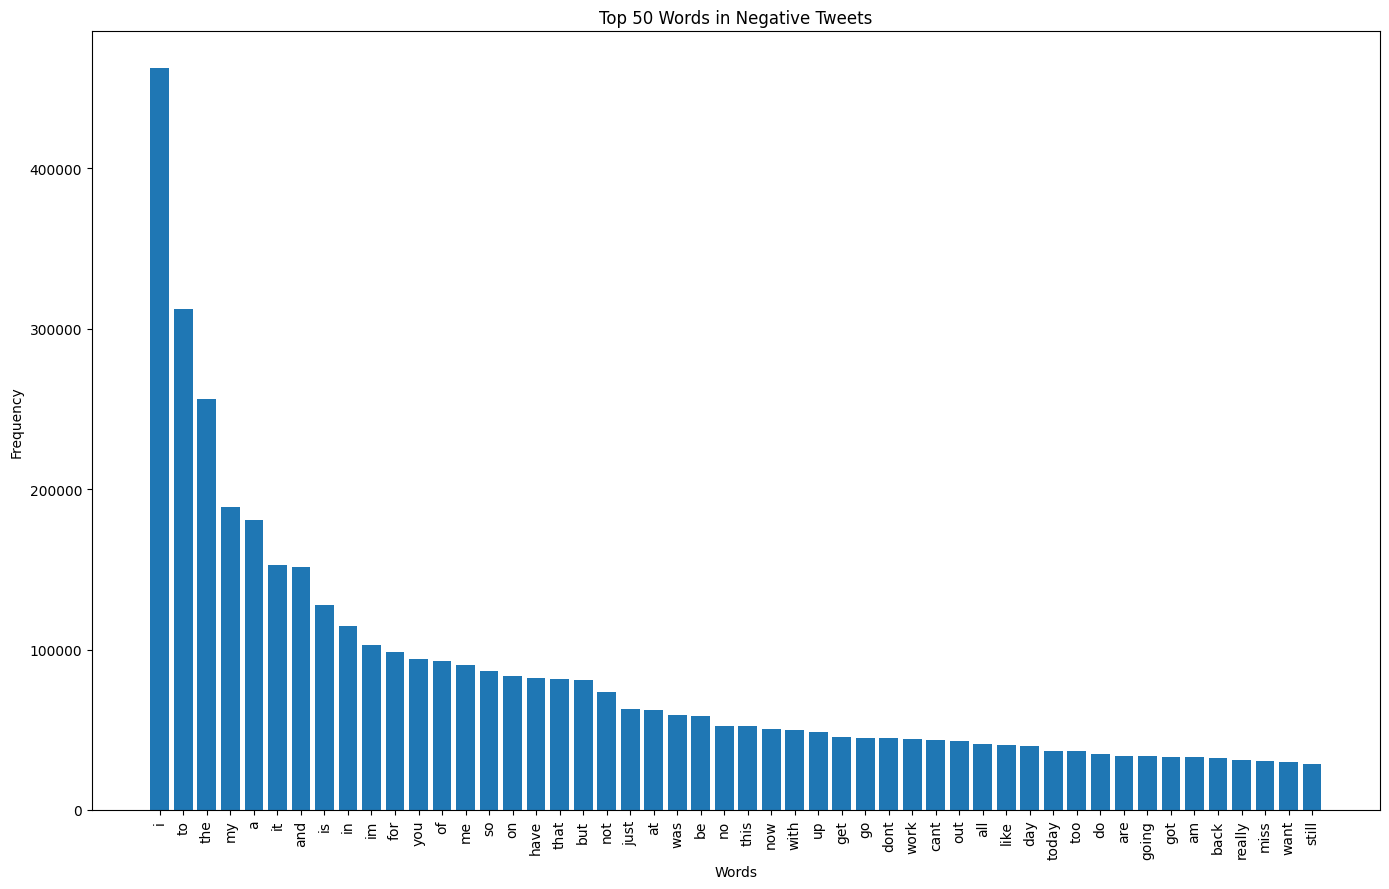

In [33]:
from collections import Counter


negative_tweets = data[data['polarity'] == 0]


word_counts = Counter()

for text in negative_tweets['cleaned_text']:
    words = text.split()
    word_counts.update(words)


top_words = word_counts.most_common(50)


words, counts = zip(*top_words)


plt.figure(figsize=(14, 9))
plt.bar(words,counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Words in Negative Tweets')
plt.xticks(rotation=90)  #
plt.tight_layout()
plt.show()


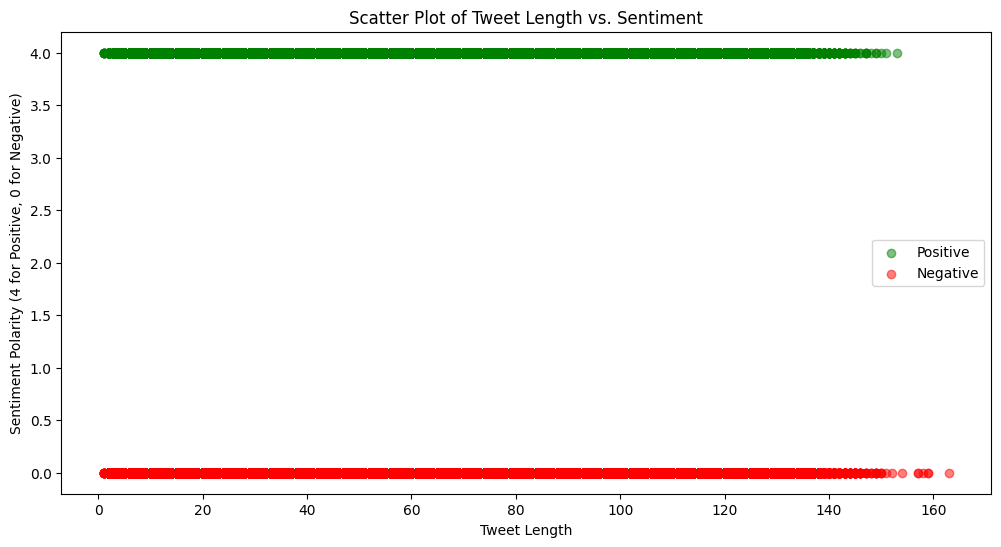

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

data['tweet_length'] = data['cleaned_text'].apply(len)


positive_tweets = data[data['polarity'] == 4]
negative_tweets = data[data['polarity'] == 0]

plt.figure(figsize=(12, 6))
plt.scatter(positive_tweets['tweet_length'], positive_tweets['polarity'], label='Positive', color='green', alpha=0.5)
plt.scatter(negative_tweets['tweet_length'], negative_tweets['polarity'], label='Negative', color='red', alpha=0.5)
plt.xlabel('Tweet Length')
plt.ylabel('Sentiment Polarity (4 for Positive, 0 for Negative)')
plt.title('Scatter Plot of Tweet Length vs. Sentiment')
plt.legend()
plt.show()


In [35]:
from sklearn.metrics import confusion_matrix


confusion = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[125545  34059]
 [  9773  39865]]


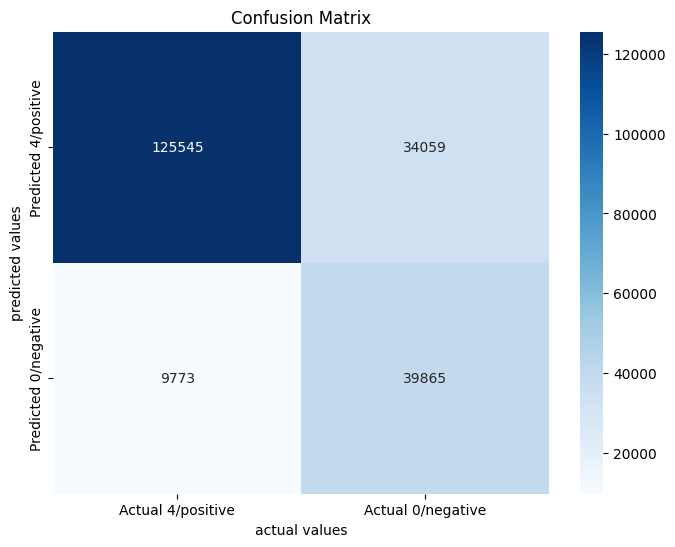

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt


confusion_matrix = confusion


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Actual 4/positive', 'Actual 0/negative'],
            yticklabels=['Predicted 4/positive', 'Predicted 0/negative'])


plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('Confusion Matrix')


plt.show()

[-0.45978797 -3.35684432  1.14043161 ... -1.31501057  0.16229234
  0.14319454]


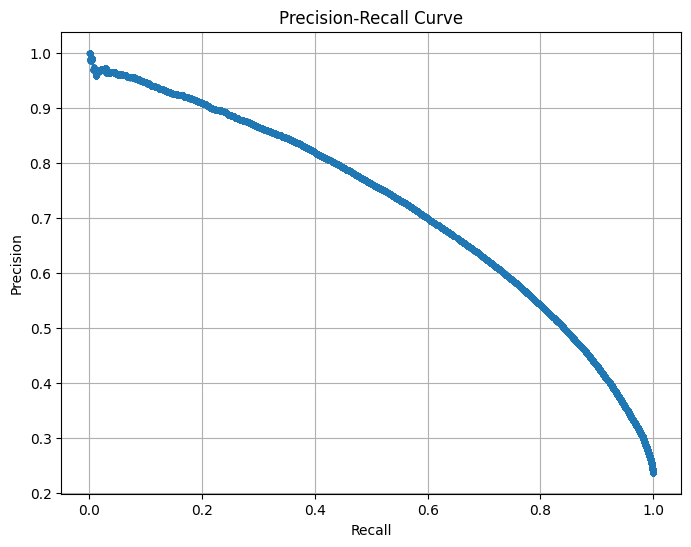

In [37]:
from sklearn.metrics import precision_recall_curve


y_test_binary = (y_test == 4).astype(int)
precision, recall, thresholds = precision_recall_curve(y_test_binary, logistic_regression.decision_function(X_test_tfdif))
print(logistic_regression.decision_function(X_test_tfdif))
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict([X_test[6]])

print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])

ValueError: ignored